In [1]:
# Import modules 
import sys
from os import getcwd
from os.path import dirname
path = dirname(dirname(getcwd()))
sys.path.append(path)

In [2]:
from MintPy.interpret_toolkit import InterpretToolkit

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
import numpy as np

In [4]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [5]:
myInterpreter = InterpretToolkit(model=clf,
                                examples=X,
                                targets=y,
                                feature_names =data.feature_names,
                                model_output='probability')

In [6]:
results = myInterpreter.calc_pd(features='mean radius', nbins=25, njobs=1, subsample=1.0, nbootstrap=1)

Using 1 processors...
Output is a probability; 
                      Only outputing the effect of the positive class!


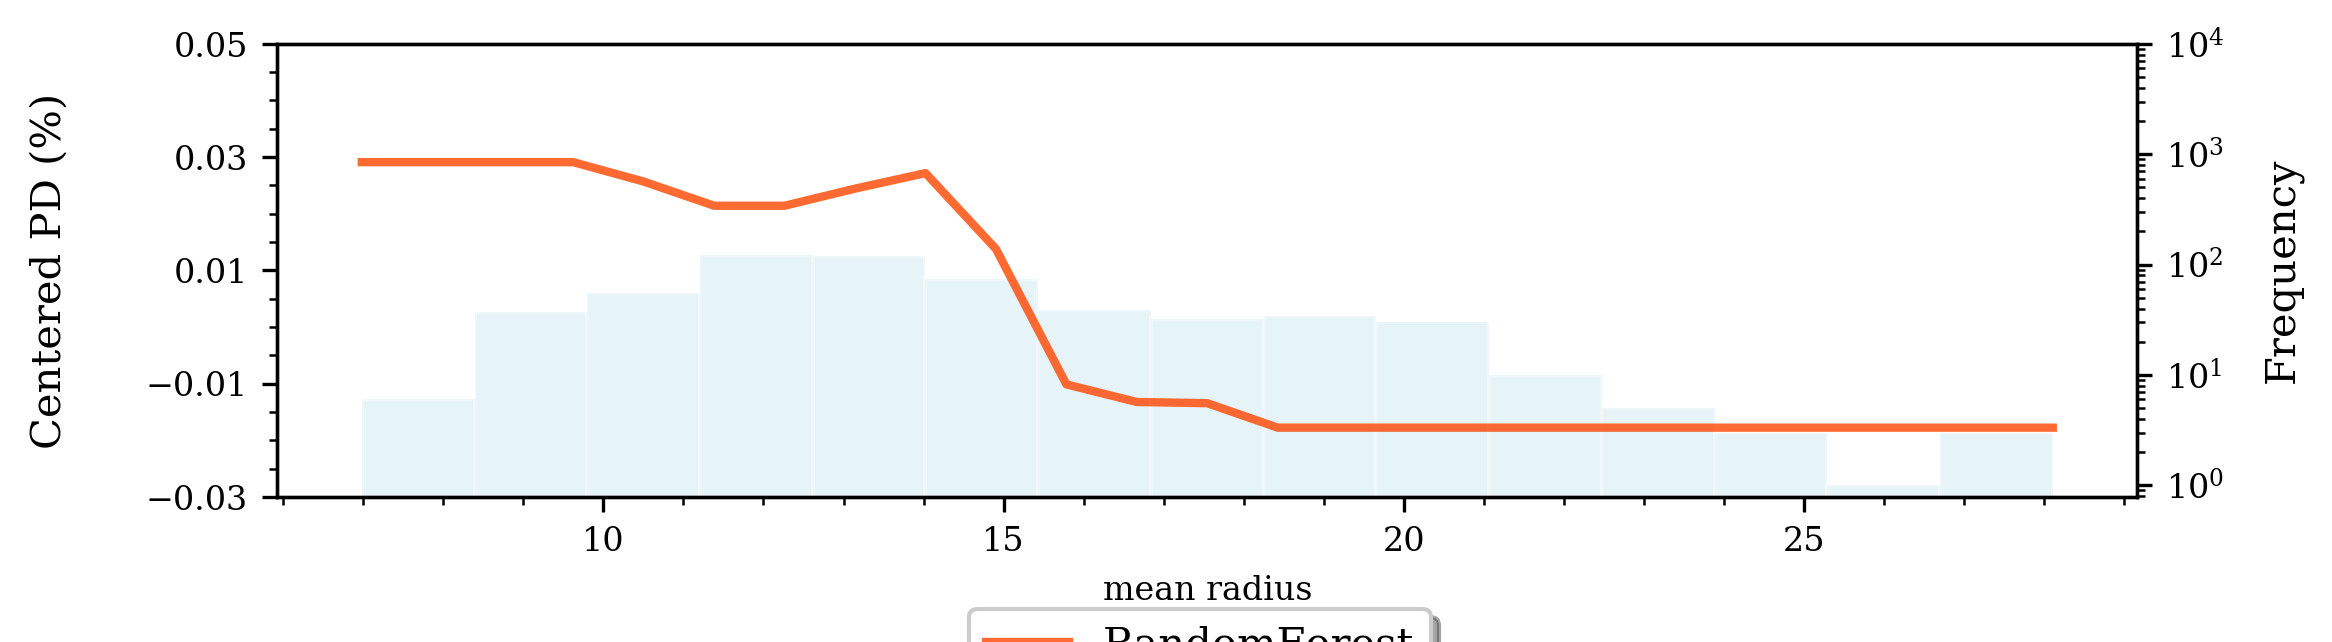

In [7]:
fig, axes = myInterpreter.plot_pd()

Using 1 processors...
starting calculations...


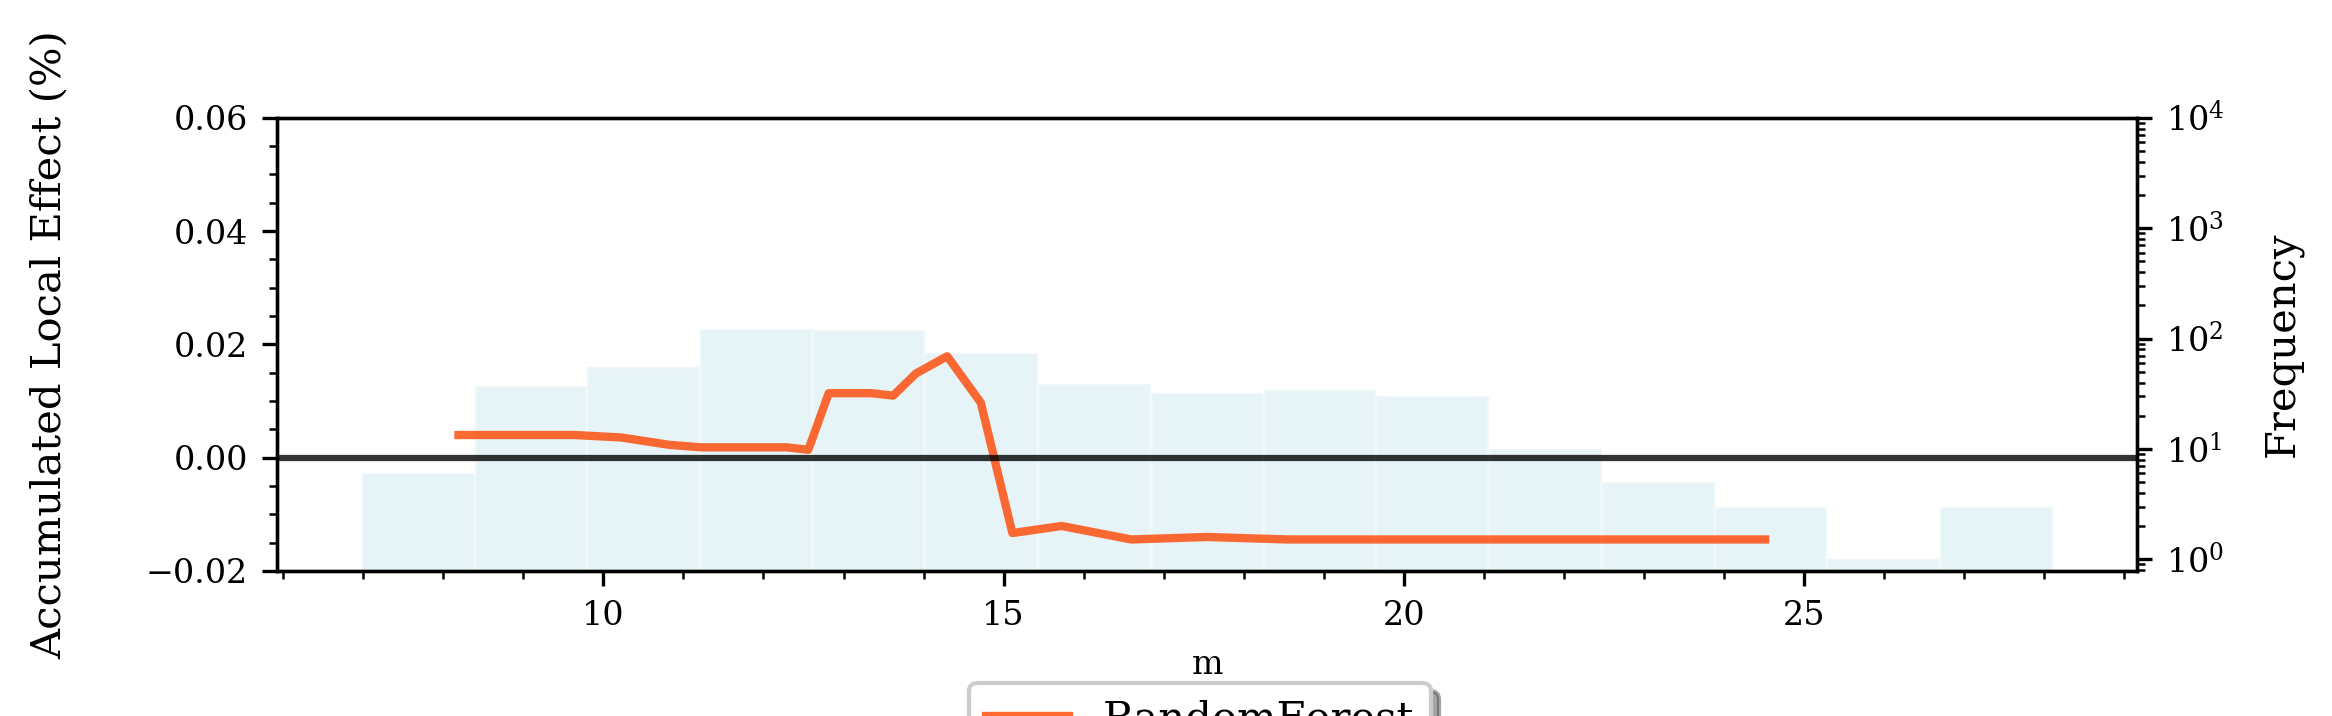

In [8]:
results = myInterpreter.calc_ale(features='mean radius', nbins=25, njobs=1, subsample=1.0, nbootstrap=1)
fig, axes = myInterpreter.plot_ale()

In [9]:
explainer = shap.TreeExplainer(clf, X, model_output='probability')
shap_values = explainer.shap_values(X)

 97%|=================== | 1106/1138 [00:16<00:00]       

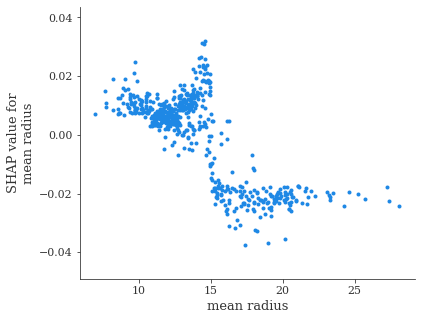

In [10]:
shap.dependence_plot(ind = 'mean radius', 
                     shap_values=shap_values[1], 
                     features=X,
                     feature_names=data.feature_names,
                     interaction_index=None)